In [11]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [12]:
# Define global variables
# get current directory
path = os.getcwd()
# parent directory
parent = os.path.dirname(path)

In [13]:
df = pd.read_csv(os.path.join(parent,'data/merged_data.csv'))
df.head()

,year,gdd_50_86_mean_1,gdd_50_86_mean_10,gdd_50_86_mean_11,gdd_50_86_mean_12_prev,gdd_50_86_mean_2,gdd_50_86_mean_3,gdd_50_86_mean_4,gdd_50_86_mean_5,gdd_50_86_mean_6,...,era5land_soilm4_avg_max_5,era5land_soilm4_avg_max_6,era5land_soilm4_avg_max_7,era5land_soilm4_avg_max_8,era5land_soilm4_avg_max_9,lat,lon,elev,county,Value
0,1952,0.048387,6.725806,3.100000,0.564516,0.000000,0.419355,5.733333,11.112903,23.683333,...,0.392231,0.354683,0.362989,0.319622,0.288316,41.75,-93.25,259.0,Jasper,67.0
1,1953,0.000000,12.306452,3.316667,0.000000,0.000000,1.387097,2.483333,10.774194,21.966667,...,0.415669,0.370127,0.327656,0.285388,0.255902,41.75,-93.25,259.0,Jasper,54.4
2,1954,0.000000,7.000000,2.283333,0.064516,0.803571,0.258065,6.916667,8.145161,21.766667,...,0.412404,0.403464,0.271365,0.368365,0.325429,41.75,-93.25,259.0,Jasper,56.9
3,1955,0.000000,7.758065,0.733333,0.000000,0.000000,0.935484,8.316667,13.774194,16.650000,...,0.371920,0.360051,0.321398,0.243463,0.346817,41.75,-93.25,259.0,Jasper,52.1
4,1956,0.016129,11.919355,2.000000,0.000000,0.000000,0.854839,4.483333,13.274194,22.666667,...,0.398224,0.331824,0.350176,0.354256,0.340532,41.75,-93.25,259.0,Jasper,42.7


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5929 entries, 0 to 5928
Columns: 342 entries, year to Value
dtypes: float64(340), int64(1), object(1)
memory usage: 15.5+ MB


In [16]:
df = df.sort_values('year')
df.head()

,year,gdd_50_86_mean_1,gdd_50_86_mean_10,gdd_50_86_mean_11,gdd_50_86_mean_12_prev,gdd_50_86_mean_2,gdd_50_86_mean_3,gdd_50_86_mean_4,gdd_50_86_mean_5,gdd_50_86_mean_6,...,era5land_soilm4_avg_max_5,era5land_soilm4_avg_max_6,era5land_soilm4_avg_max_7,era5land_soilm4_avg_max_8,era5land_soilm4_avg_max_9,lat,lon,elev,county,Value
0,1952,0.048387,6.725806,3.100000,0.564516,0.000000,0.419355,5.733333,11.112903,23.683333,...,0.392231,0.354683,0.362989,0.319622,0.288316,41.75,-93.25,259.0,Jasper,67.0
4857,1952,0.467742,8.112903,3.900000,1.064516,0.189655,1.306452,8.433333,13.209677,24.800000,...,0.411525,0.389954,0.391892,0.378071,0.309354,41.28,-91.68,227.0,Washington,64.6
2713,1952,0.209677,7.758065,3.266667,0.677419,0.034483,1.225806,7.766667,11.903226,23.050000,...,0.397833,0.414237,0.409846,0.379750,0.285975,41.65,-91.53,208.0,Johnson,71.7
1638,1952,0.000000,6.225806,2.516667,0.338710,0.000000,0.903226,6.366667,10.516129,22.250000,...,0.418758,0.401579,0.379492,0.363992,0.296825,42.03,-95.33,397.0,Crawford,62.8
4999,1952,0.000000,6.387097,2.966667,0.354839,0.000000,0.854839,7.416667,10.822581,22.633333,...,0.405067,0.382462,0.396283,0.365929,0.283133,42.47,-93.80,322.0,Hamilton,63.2


In [17]:
# use time-series splitting to split data
def split_data(df, val_years = 5, test_years = 5):

    # [todo] add check to ensure years must be integers

    min_year = df['year'].min()
    total_years = df['year'].max() - df['year'].min() + 1

    train_years = total_years - val_years - test_years

    train_df = df[df['year'] < min_year + train_years]
    val_df = df[(df['year'] >= min_year + train_years) & (df['year'] < min_year + train_years + val_years)]
    test_df = df[df['year'] >= min_year + train_years + val_years]

    return train_df, val_df, test_df

In [18]:
train_df, val_df, test_df = split_data(df)

## Baseline Model:

In [19]:
# train a very basic linear regression model using train_df
X_train = train_df.drop(['Value'], axis=1)

In [20]:
y_train = train_df['Value']

### Try out feature selection:

In [21]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [27]:
lasso = Lasso()

# select features using SelectFromModel
selector = SelectFromModel(Lasso())
selector.fit(X_train_prep, y_train)
X_train_reduced = selector.transform(X_train_prep)


In [35]:
pipe = Pipeline([('encoder', preprocessor), 
                 ('selector', SelectFromModel(Lasso()))])

In [37]:
pipe.fit(X_train, y_train)
X_train_reduced = pipe.transform(X_train)
pipe.get_feature_names_out()

array(['std__year', 'std__gdd_50_86_mean_2', 'std__gdd_50_86_mean_9',
       'std__gdd_50_86_std_10', 'std__gdd_50_86_std_7',
       'std__gdd_50_86_min_5', 'std__gdd_50_86_max_10',
       'std__high_mean_7', 'std__high_mean_8', 'std__high_std_5',
       'std__high_min_10', 'std__high_min_11', 'std__high_min_7',
       'std__high_max_11', 'std__high_max_4', 'std__high_max_7',
       'std__high_max_8', 'std__low_std_2', 'std__low_std_4',
       'std__low_std_8', 'std__low_min_11', 'std__low_min_6',
       'std__precip_mean_12_prev', 'std__precip_mean_5',
       'std__precip_mean_6', 'std__precip_mean_8', 'std__precip_std_3',
       'std__era5land_srad_mean_10', 'std__era5land_srad_mean_11',
       'std__era5land_srad_std_12_prev', 'std__era5land_srad_std_2',
       'std__era5land_srad_min_12_prev', 'std__era5land_srad_min_5',
       'std__era5land_srad_max_2', 'std__era5land_srad_max_3',
       'std__era5land_soilt4_avg_mean_2',
       'std__era5land_soilt4_avg_std_6', 'std__era5land_so

In [38]:
X_train_reduced.shape

(5146, 45)

In [39]:
feature_names = selector.get_feature_names_out()

In [43]:
list(map(lambda x: x.split('__')[1], feature_names))

['year',
 'gdd_50_86_mean_2',
 'gdd_50_86_mean_9',
 'gdd_50_86_std_10',
 'gdd_50_86_std_7',
 'gdd_50_86_min_5',
 'gdd_50_86_max_10',
 'high_mean_7',
 'high_mean_8',
 'high_std_5',
 'high_min_10',
 'high_min_11',
 'high_min_7',
 'high_max_11',
 'high_max_4',
 'high_max_7',
 'high_max_8',
 'low_std_2',
 'low_std_4',
 'low_std_8',
 'low_min_11',
 'low_min_6',
 'precip_mean_12_prev',
 'precip_mean_5',
 'precip_mean_6',
 'precip_mean_8',
 'precip_std_3',
 'era5land_srad_mean_10',
 'era5land_srad_mean_11',
 'era5land_srad_std_12_prev',
 'era5land_srad_std_2',
 'era5land_srad_min_12_prev',
 'era5land_srad_min_5',
 'era5land_srad_max_2',
 'era5land_srad_max_3',
 'era5land_soilt4_avg_mean_2',
 'era5land_soilt4_avg_std_6',
 'era5land_soilt4_avg_max_6',
 'era5land_soilm4_avg_std_12_prev',
 'era5land_soilm4_avg_std_4',
 'era5land_soilm4_avg_std_6',
 'era5land_soilm4_avg_std_7',
 'era5land_soilm4_avg_min_8',
 'lat',
 'elev']

In [23]:
# set up a transformer to preform encoding

# later can write this as my own class so I can add more functionalities that are not in sklearn, inherit an sklearn class so it can go into a standard sklearn pipeline?

onehot_ftrs = ['county']
std_ftrs = X_train.columns.drop(onehot_ftrs).tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs),
        #'feature_selection', SelectFromModel(Lasso())
    ]
)

In [24]:
X_train_prep = preprocessor.fit_transform(X_train)
transformed_feature_names = preprocessor.get_feature_names_out()
X_train_prep = pd.DataFrame(X_train_prep, columns=transformed_feature_names)

In [55]:
# simple linear regression
LR = LinearRegression()
LR.fit(X_train_prep, y_train)
# evaluate the model
y_train_pred = LR.predict(X_train_prep)


In [56]:
mse = mean_squared_error(y_train, y_train_pred)

In [57]:
mse

109.28467442168291

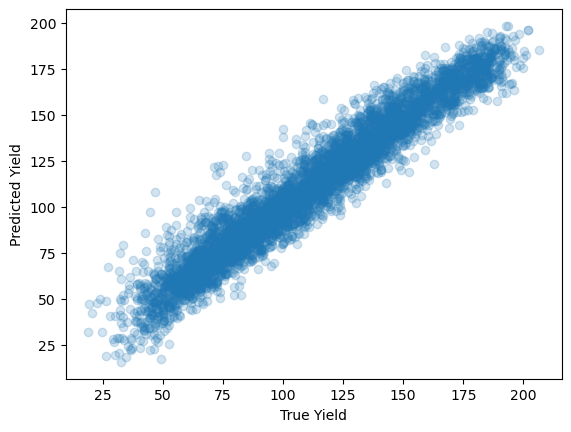

In [59]:
# plot predicted and true y values
plt.scatter(y_train, y_train_pred, alpha = 0.2)
plt.xlabel('True Yield')
plt.ylabel('Predicted Yield')
plt.show()

<Axes: xlabel='year', ylabel='Value'>

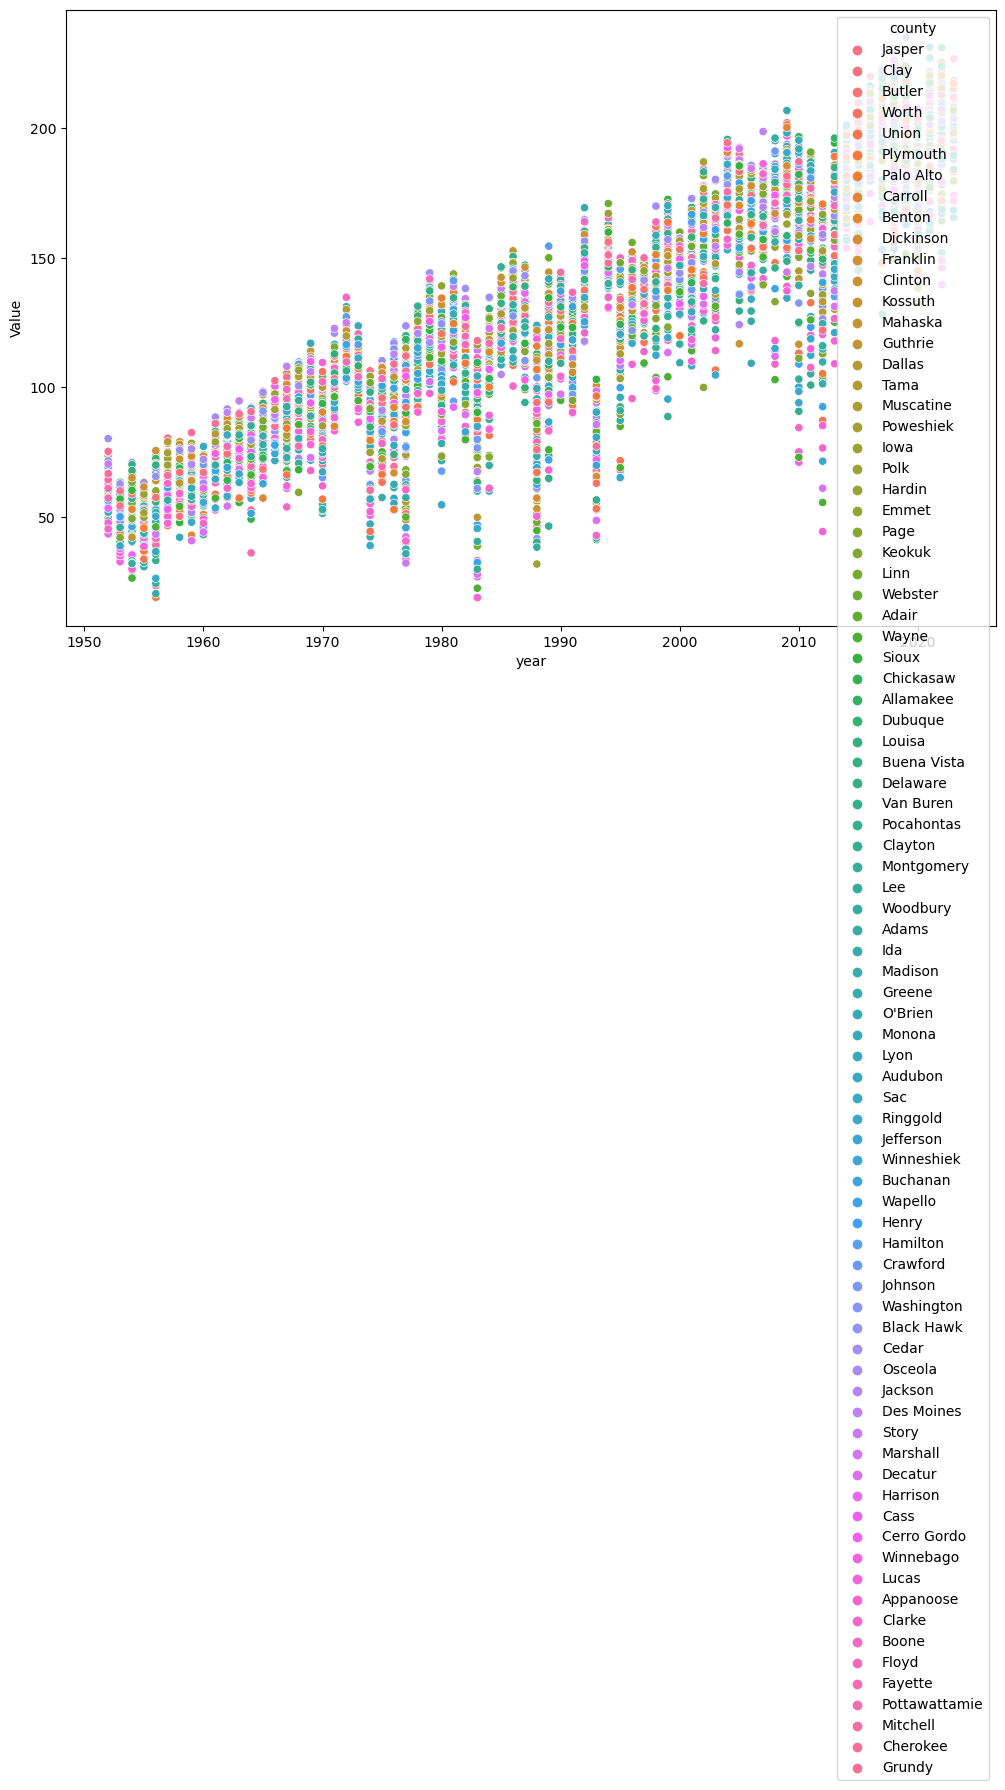

In [67]:
figure = plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="year", y="Value", hue = "county")

In [ ]:
# Example of how to include feature selection as part of a pipeline

clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
  ('classification', RandomForestClassifier())
])
clf.fit(X, y)